In [53]:
### in this task missing values *should be imputed* with the mean value of the column
### impute missing values only in columns required for solutions

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

#%matplotlib inline
#import matplotlib_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [55]:
df = pd.read_csv("amazon_books_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        946 non-null    object 
 1   author       824 non-null    object 
 2   price        944 non-null    float64
 3   pages        934 non-null    float64
 4   avg_reviews  823 non-null    float64
 5   n_reviews    946 non-null    int64  
 6   dimensions   914 non-null    object 
 7   weight       943 non-null    object 
 8   language     943 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 66.6+ KB


#### Question 1

In [56]:
### decide what data type each column is: numerical-discrete, numerical-continuous, categorical-nominal, categorical-ordinal
### consider only [price, pages, avg_reviews, n_reviews, language] for this analysis
### no need to add explanations, just the final answer

In [57]:
df.head()

,title,author,price,pages,avg_reviews,n_reviews,dimensions,weight,language
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,6 x 0.62 x 9 inches,12.5 ounces,English
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,7 x 0.68 x 10 inches,1.28 pounds,English
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,7 x 1 x 9.25 inches,1.57 pounds,English
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,7 x 0.75 x 9 inches,1.23 pounds,English
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,7 x 0.9 x 9.19 inches,1.5 pounds,English


In [58]:
datatypes = {
    "price": "numerical-continuous",
    "pages": "numerical-discrete",
    "avg_reviews": "numerical-continuous",
    "n_reviews": "numerical-discrete",
    "language": "categorical-nominal",
}

#### Question 2

In [59]:
### plot a histogram of books' number of pages using 50 bins
### decide if the distribution is symmetric, skewed positive or skewed negative
### use both the histogram and required computations for this decision

In [60]:
pages = df['pages']
pages_mean = pages.mean()

In [61]:
# Fill missing values of pages with the mean
pages.fillna(pages_mean, inplace=True)

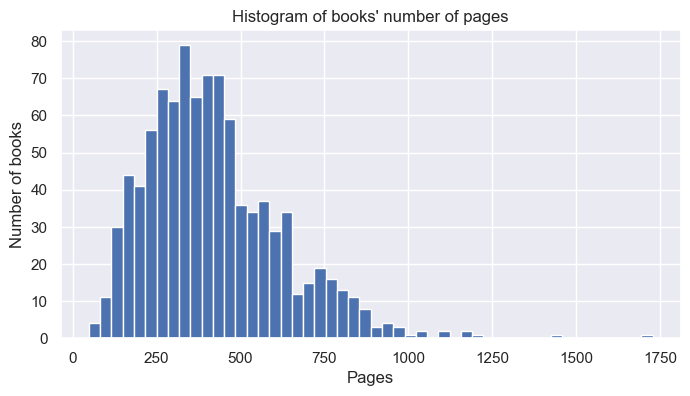

In [62]:
df['pages'].hist(bins=50)
plt.title("Histogram of books' number of pages")
plt.xlabel("Pages")
plt.ylabel("Number of books")
plt.show()

In [63]:
pages_median = df['pages'].median()
print (pages_mean, pages_median)

419.3565310492505 384.0


The distruburion is skewed negative since the mean is less then the median

#### Question 3

In [64]:
### inspect the 'weight' column carefully
### plot a histogram of books' weight using 50 bins
### decide if the distribution is symmetric, skewed positive or skewed negative
### use both the histogram and required computations for this decision

In [65]:
df.head()

,title,author,price,pages,avg_reviews,n_reviews,dimensions,weight,language
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,6 x 0.62 x 9 inches,12.5 ounces,English
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,7 x 0.68 x 10 inches,1.28 pounds,English
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,7 x 1 x 9.25 inches,1.57 pounds,English
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,7 x 0.75 x 9 inches,1.23 pounds,English
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,7 x 0.9 x 9.19 inches,1.5 pounds,English


In [66]:
def normalize_to_pounds(book_obj):

    if book_obj == None:
        return None

    if isinstance(book_obj, float):
        return book_obj

    if isinstance(book_obj, str):
        book_weight, weight_type = book_obj.split()
        book_weight = float(book_weight)

        if weight_type == "pounds":
            return book_weight

        if weight_type == "ounces":
            return book_weight / 16

        return None


In [67]:
df["normalized_weight"] = df["weight"].apply(normalize_to_pounds)

In [68]:
weights_mean = df["normalized_weight"].mean()

normalize_weights = df["normalized_weight"]

normalize_weights.fillna(weights_mean, inplace=True)

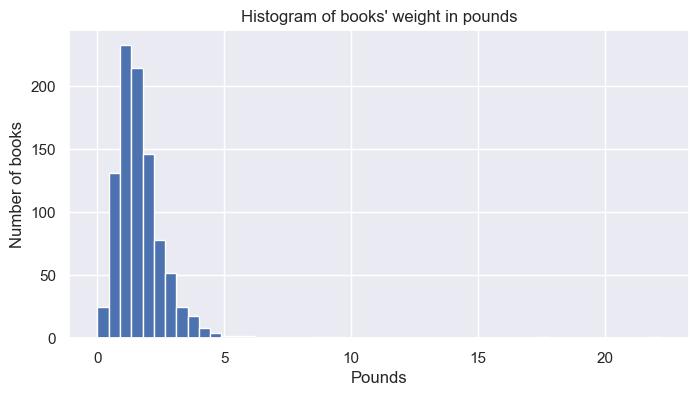

In [69]:
df["normalized_weight"].hist(bins=50)
plt.title("Histogram of books' weight in pounds")
plt.xlabel("Pounds")
plt.ylabel("Number of books")
plt.show()

In [71]:
weight_median = df["normalized_weight"].median()
print(weights_mean, weight_median)

1.7144754109225873 1.48


The mean is greater then the

#### Question 4

In [72]:
### compute Pearson's correlation between a book's volume (inferred by its dimensions) and price in the data
### (you can use the built-in Series.corr() function for that purpose)

In [73]:
df["dimensions"].map(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

In [76]:
import re
def infer_volume(dimension):

    if dimension == None:
        return None

    if type(dimension) == float:
        return dimension
    
    if type(dimension) == str:
        nums = re.findall(r"[\d.]+", dimension)

        if len(nums) != 3:
            return None

        l, w, h = map(float, nums)
        return l * w * h

In [77]:
df["volume"] = df["dimensions"].apply(infer_volume)

In [86]:
volume_price_cov = df["volume"].corr(df["price"])
volume_price_cov


0.43186394634446673

#### Question 5

In [29]:
### show a scatter plot of a book's volume (inferred by its dimensions) and price
### do the results fit the score you got in the previous cell? (no need to print answer to this question)

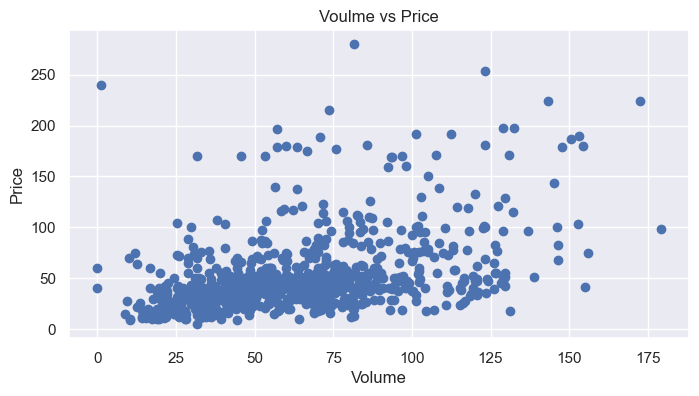

In [87]:
plt.scatter(df["volume"], df["price"])
plt.xlabel("Volume")
plt.ylabel("Price")
plt.title("Voulme vs Price")
plt.show()

#### Question 6

In [32]:
### inspect book titles carefully: they can be roughly split by keyphrases:
### ['data science', 'data analytics', 'data engineering', 'machine learning', 'statistics', 
### 'deep learning', 'natural language processing']

### a book belongs to one of the above categories if its name contains the corresponding keyphrase
### display the number of books that fall into each category and their total, in the same table
### some books may not belong to any of the listed above categories
### category match should be case insensitive

#### Question 7

In [35]:
### display the same result where the dataframe is sorted by the number of books, descending
### no need to display the total amount in this result - drop it

#### Question 8

In [38]:
### sample 10000 values from N~(50, 10)
### for this pirpose use https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

### what portion of the distribution is found in the range (42.5, 57.5)? -- calculate using z table
### (recall the NormalDist().cdf() function we used at the lecture)

### what portion of the distribution is found in the range (42.5, 57.5)? -- compute empirically using the sampled values
### report both values (calculated and empirical)

#### Question 9

In [41]:
### compute confidence interval of 90% for the true population mean of a book price on Amazon
### report left and right boundaries

#### Question 10

In [48]:
### can one say with 85% confidence that the true population mean of a book price resides within the [49.0, 54.0] interval?
### show your computations, and print your answer: yes or no